In [65]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

X, y = make_moons(n_samples=50, noise=0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 4.1 Bagging sur données synthétiques

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            max_samples=0.5, max_features=0.5, n_estimators=5)

bagging.fit(X=X_train, y=y_train)

pass

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.50      0.33      0.40         3

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]


ValueError: X has 2 features, but KNeighborsClassifier is expecting 1 features as input.

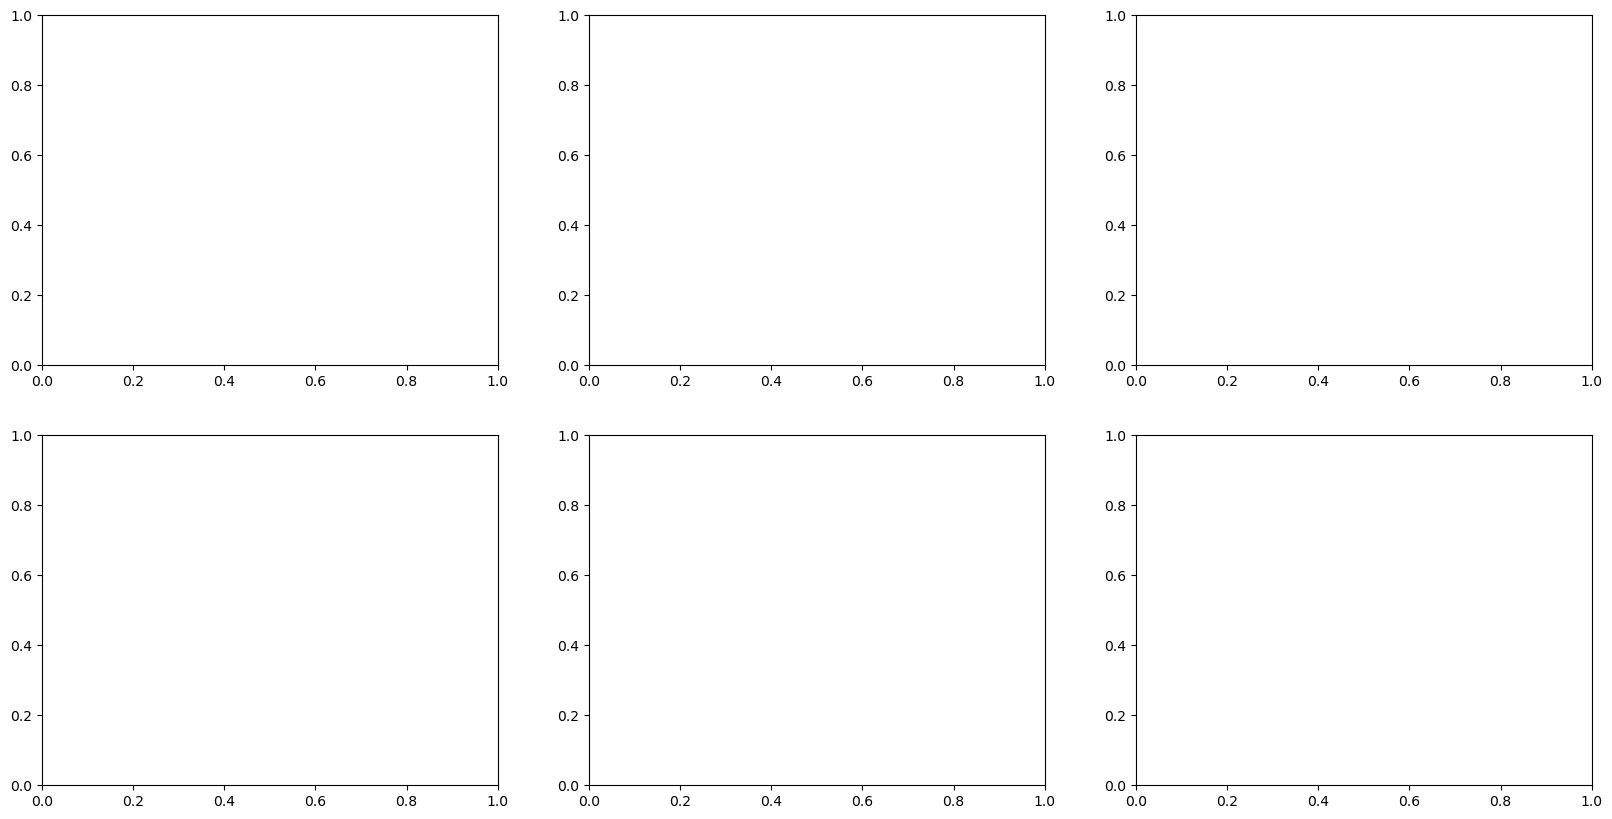

In [70]:

y_pred = bagging.predict(X=X_test)

report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)
print(bagging.estimators_)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    #ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)

plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1,1], alpha=.4),
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# 4.2 Forêts décisionnelles - Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


df = pd.read_csv("Data/column.csv")

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)


## Cross Validation

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
# Score du décision tree
c = DecisionTreeClassifier()

#c.fit(X=X_train, y=y_train)

#y_pred = c.predict(X=X_test)

scores = cross_val_score(c, X, y, cv=5)
print(scores.mean())

# Score de la forêt
c = RandomForestClassifier(n_estimators=11, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(c, X, y, cv=5)
print(scores.mean())

0.8161290322580645
0.8709677419354838
